In [13]:
# Load Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import trim_mean

# Load Titanic Dataset and handle missing values
df = sns.load_dataset('titanic')

df


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


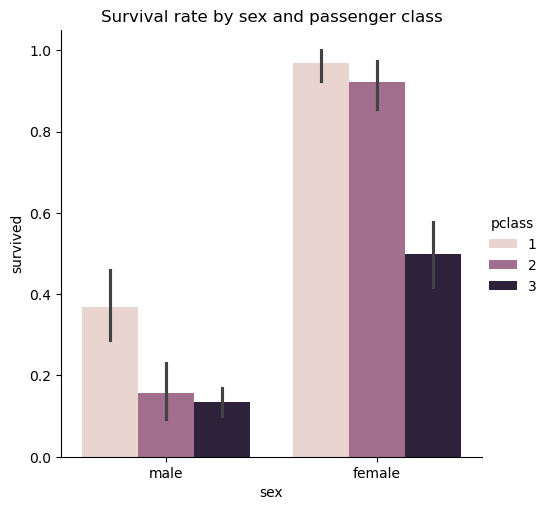

Females had much higher survival rates than males in every class. First-class passengers had the highest survival rates. Third-class males had the lowest survival rate. The vertical black lines represent confidence intervals which shows statistical uncertainty


In [18]:
# Implementing a Factor plot - Bivariate plot

sns.catplot(
    data = df,
    x = "sex",
    y = "survived",
    hue= "pclass",
    kind = 'bar')

plt.title("Survival rate by sex and passenger class")
plt.show()
print("Females had much higher survival rates than males in every class. First-class passengers had the highest survival rates. Third-class males had the lowest survival rate. The vertical black lines represent confidence intervals which shows statistical uncertainty")
    

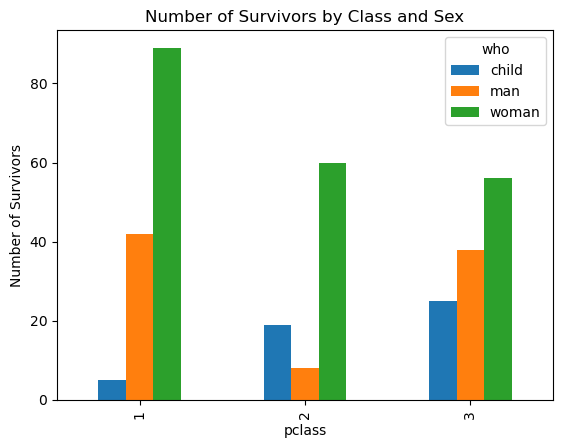

Most female survivors were in First Class. Women survived more than men in all classes. Children had noticeable survival counts, more so in 2nd and 3rd class. Third class had many survivors, but that indicates the high amount of passengers, and does not mean high survival rate


In [22]:
# Grouped Bar Chart - Multivariate Plot

grouped = df.groupby(['pclass', 'who'])['survived'].sum().unstack()

grouped.plot(kind='bar')

plt.title("Number of Survivors by Class and Sex")
plt.ylabel("Number of Survivors")
plt.show()
print("Most female survivors were in First Class. Women survived more than men in all classes. Children had noticeable survival counts, more so in 2nd and 3rd class. Third class had many survivors, but that indicates the high amount of passengers, and does not mean high survival rate")

                          

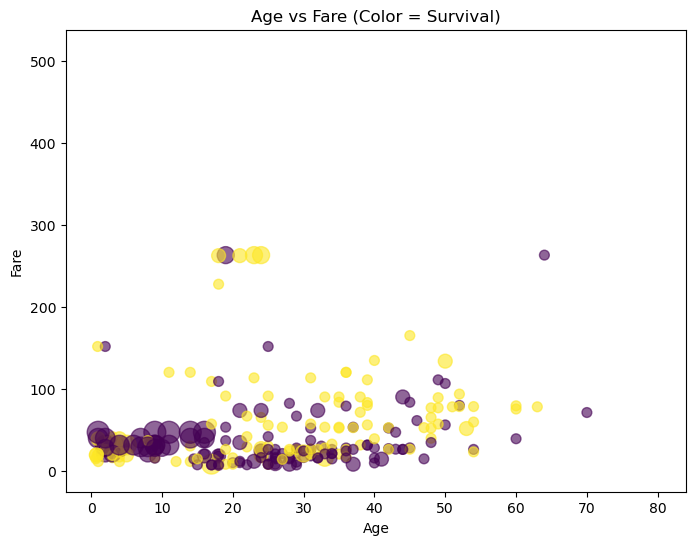

Higher fares (often first-class passengers) are more associated with survival. Many low-fare passengers did not survive. Younger passengers and those with family (larger bubbles) appear frequently in survival groupings. There’s no strong linear relationship between age and fare, but class (reflected in fare) matters a lot


In [21]:
# Age vs Fare

plt.figure(figsize=(8,6))

plt.scatter(
    df['age'],
    df['fare'],
    s=df['sibsp'] * 50,
    c=df['survived'],
    alpha=0.6
)

plt.xlabel("Age")
plt.ylabel("Fare")
plt.title("Age vs Fare (Color = Survival)")
plt.show()
print("Higher fares (often first-class passengers) are more associated with survival. Many low-fare passengers did not survive. Younger passengers and those with family (larger bubbles) appear frequently in survival groupings. There’s no strong linear relationship between age and fare, but class (reflected in fare) matters a lot")